# Import libraries

In [2]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Dataset

In [3]:
df_1 = pd.read_pickle(r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\02 Data\Prepared data\df_merge_4_9.pkl")

In [4]:
df_1.shape

(4472245, 33)

# 2. Address PII implications 

In [5]:
df_1.columns


Index(['Unnamed', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge_x', 'max_order',
       'loyalty_flag', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', '_merge_y', 'spending',
       'spending_flag', 'frequency', 'frequency_flag', 'surname', 'gender',
       'state', 'age', 'date_joined', 'number_dependants', 'fam_status',
       'income'],
      dtype='object')

In [6]:
# drop sur names 

df_2 = df_1.drop(columns = ['surname'])     

In [7]:
df_2.columns 

Index(['Unnamed', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge_x', 'max_order',
       'loyalty_flag', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'department', '_merge_y', 'spending',
       'spending_flag', 'frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'number_dependants', 'fam_status', 'income'],
      dtype='object')

# 3. Customer behaivor in different geographical regions

In [8]:
#list of states and value counts 

df_2['state'].value_counts(dropna = False)

California              102840
Alabama                  98414
New York                 96057
Virginia                 93787
Indiana                  93352
Pennsylvania             92515
Rhode Island             92241
Minnesota                91728
South Carolina           90830
Tennessee                90588
Illinois                 90294
Oklahoma                 90192
Michigan                 89777
North Dakota             89690
Louisiana                89578
Oregon                   89057
Washington               88913
Alaska                   88679
Kansas                   88667
Colorado                 88536
Missouri                 88355
Connecticut              88248
Wyoming                  88173
Massachusetts            87807
District of Columbia     87796
Mississippi              87553
New Hampshire            87504
North Carolina           87423
Georgia                  87342
Maine                    87214
Hawaii                   87182
Kentucky                 86854
Arkansas

In [9]:
# create region 

result = []

for value in df_2['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Deleware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
        result.append('South')
    else:
        result.append('West')

In [10]:
# Add new column of region and set equal to results 

df_2['region'] = result

In [11]:
# Check the count 

df_2['region'].value_counts(dropna = False)

South        1409352
West         1216249
Midwest      1045077
Northeast     801567
Name: region, dtype: int64

In [12]:
# Check that the new region count matches overall count 

df_2.shape 

(4472245, 33)

# 3b. Difference in spending habits between regions 

In [13]:
crosstab = pd.crosstab(df_2['region'],df_2['spending_flag'],dropna = False)

In [14]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,18187,1026890
Northeast,15727,785840
South,26017,1383335
West,24505,1191744


In [15]:
# Get percent of high spenders vs their total population

Midwest = (18187/7603810)*100
Northeast = (15727/5728347)*100
South = (26017/10164163)*100
West = (24505/8760516)*100

In [16]:
Midwest

0.23918272550208383

In [17]:
Northeast

0.2745469155412547

In [18]:
South

0.25596795328843114

In [19]:
West

0.2797209662079266

Slight difference in spending habits. Highest to lowest include West, Northeast, South, Midwest. 

# 4. Exclusion flag for low-activity customers (less than 5 orders)

In [20]:
df_2.loc[df_2['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [21]:
df_2.loc[df_2['max_order'] >= 5, 'exclusion_flag'] = 'Non low activity customer'

In [22]:
df_2['exclusion_flag'].value_counts(dropna = False)

Non low activity customer    4274711
Low activity customer         197534
Name: exclusion_flag, dtype: int64

In [23]:
df_low_activity_cust = df_2[df_2['exclusion_flag'] == 'Low activity customer']

In [24]:
df_non_low_activity_cust = df_2[df_2['exclusion_flag'] == 'Non low activity customer']

In [25]:
# Check dataset

df_low_activity_cust['max_order'].value_counts()

4    100629
3     96905
Name: max_order, dtype: int64

In [26]:
path = r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\02 Data\Prepared data"

In [27]:
# export dataset

df_low_activity_cust.to_pickle(os.path.join(path,'low_activity_cust.pkl'))

In [28]:
df_non_low_activity_cust.to_pickle(os.path.join(path,'non_low_activity_cust.pkl'))

# 5. Customer profiling in database 

In [29]:
# check age range of customers

df_2['age'].value_counts().sort_index()

18    79273
19    73172
20    74502
21    66158
22    69559
      ...  
77    73509
78    64347
79    63861
80    71218
81    71769
Name: age, Length: 64, dtype: int64

In [30]:
age_group = []

for value in df_2['age']:
    if value <= 20:
        age_group.append('18-20')
    elif (value > 20) and (value <= 30):
        age_group.append('21-30')
    elif (value > 30) and (value <= 40):
        age_group.append('31-40')
    elif (value > 40) and (value <= 50):
        age_group.append('41-50')
    elif (value > 50) and (value <= 60):
        age_group.append('51-60')
    elif (value > 60) and (value <= 70):
        age_group.append('61-70')
    elif (value > 70) and (value <= 80):
        age_group.append('71-80')
    elif (value > 80) and (value <= 82):
        age_group.append('80+')    
    else:
        result.append('Not in age category')

In [31]:
df_2['age_group'] = age_group

In [32]:
df_2['age_group'].value_counts().sort_index()

18-20    226947
21-30    698103
31-40    702296
41-50    684711
51-60    709814
61-70    692286
71-80    686319
80+       71769
Name: age_group, dtype: int64

In [33]:
# income ranges 

df_2['income'].value_counts().sort_index()

26116     506
26137      56
26234     741
26307      13
26308      86
         ... 
521807    669
552776    544
553569    138
569810    395
576876    593
Name: income, Length: 25692, dtype: int64

In [34]:
customer_income = df_2['income'].value_counts().sort_index()

In [35]:
customer_income.to_clipboard()

In [36]:
# Create income brackets

income = []

for value in df_2['income']:
    if value <= 25000: 
        income.append('0-025000')
    elif (value > 25000) and (value <= 40000):
        income.append('025000-040000')
    elif (value > 40000) and (value <= 80000):
        income.append('040000-080000')
    elif (value > 80000) and (value <= 120000):
        income.append('080000-120000')
    elif (value > 120000) and (value <= 160000):
        income.append('120000-160000')
    elif (value > 160000) and (value <= 210000):
        income.append('160000-210000')
    elif (value > 210000) and (value <= 523000):
        income.append('210000-523000')
    elif (value > 523000):
        income.append('523000+')
    else: 
        income.append('other')

In [37]:
# Add column equal to income bracket

df_2['income_range'] = income

In [38]:
# check results 

df_2['income_range'].value_counts().sort_index()

025000-040000     243767
040000-080000    1396686
080000-120000    1528371
120000-160000     997519
160000-210000     271014
210000-523000      33218
523000+             1670
Name: income_range, dtype: int64

In [39]:
# range of number of dependents
df_2['number_dependants'].value_counts().sort_index()

0    1110283
1    1123897
2    1130051
3    1108014
Name: number_dependants, dtype: int64

In [40]:
# parent/non parent 
df_2.loc[df_2['number_dependants'] == 0, 'parental_status'] = 'non parent'
df_2.loc[df_2['number_dependants'] >= 1, 'parental_status'] = 'parent'

In [41]:
# check 

df_2['parental_status'].value_counts(dropna = False)

parent        3361962
non parent    1110283
Name: parental_status, dtype: int64

In [42]:
# variable for day of week
df_2['order_dow'].value_counts().sort_index()

0    843810
1    774588
2    580663
3    534485
4    525352
5    587302
6    626045
Name: order_dow, dtype: int64

In [43]:
# create crosstab 

orders_day_of_week = pd.crosstab(df_2['order_dow'],df_2['order_number'],dropna = False)

In [44]:
orders_day_of_week

order_number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
order_dow,,,,,,,,,,,,,,,,,,,,,
0,57667,55753,56653,49232,43502,39430,35835,32725,30075,27847,...,213,327,250,327,257,206,334,227,274,192
1,49721,48198,48557,41535,38241,34278,31669,28907,25726,25368,...,471,479,318,346,329,398,287,346,382,400
2,36153,36594,37548,32506,29495,27417,23244,21884,20308,17747,...,335,401,342,315,410,347,284,188,185,319
3,33419,33338,32187,31299,26207,23739,21629,20716,18111,15598,...,424,386,341,341,269,295,392,342,256,320
4,32171,30997,33007,29149,26756,22838,22451,19054,18108,16890,...,330,234,399,329,331,233,301,297,273,304
5,34359,35897,35254,31500,29380,25467,22242,21377,19645,18651,...,465,324,278,292,229,371,218,307,369,311
6,42492,41537,40068,35500,31830,30729,26799,23336,21704,19399,...,314,283,317,212,171,236,198,155,208,182


In [45]:
#create weekday column 

df_2.loc[df_2['order_dow'] == 0, 'weekday'] = 'Saturday'
df_2.loc[df_2['order_dow'] == 1, 'weekday'] = 'Sunday'
df_2.loc[df_2['order_dow'] == 2, 'weekday'] = 'Monday'
df_2.loc[df_2['order_dow'] == 3, 'weekday'] = 'Tuesday'
df_2.loc[df_2['order_dow'] == 4, 'weekday'] = 'Wednesday'
df_2.loc[df_2['order_dow'] == 5, 'weekday'] = 'Thursday'
df_2.loc[df_2['order_dow'] == 6, 'weekday'] = 'Friday'

In [46]:
# check

df_2['weekday'].value_counts().sort_index()

Friday       626045
Monday       580663
Saturday     843810
Sunday       774588
Thursday     587302
Tuesday      534485
Wednesday    525352
Name: weekday, dtype: int64

In [47]:
# part of the day
df_2['order_hour_of_day'].value_counts().sort_index()

0      27982
1      14826
2       8828
3       6679
4       7699
5      12389
6      39955
7     124515
8     237493
9     338544
10    380560
11    376766
12    363108
13    368649
14    369447
15    366196
16    347172
17    293097
18    225407
19    174972
20    135080
21    111158
22     87223
23     54500
Name: order_hour_of_day, dtype: int64

In [48]:
result = []

for value in df_2['order_hour_of_day']:
    if value <= 11: 
        result.append('Morning')
    elif (value > 11) and (value <= 17):
        result.append('Afternoon')
    elif (value > 17) and (value <= 24):
        result.append('Evening')
    else: 
        result.append('other')

In [49]:
result

['Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning'

In [50]:
df_2['part_of_day'] = result

In [51]:
# check

df_2['part_of_day'].value_counts()

Afternoon    2107669
Morning      1576236
Evening       788340
Name: part_of_day, dtype: int64

In [52]:
df_2['fam_status'].value_counts()

married                             3130673
single                               719015
divorced/widowed                     391268
living with parents and siblings     231289
Name: fam_status, dtype: int64

# 6. Create appropriate visualization to show the distribution of profiles

In [53]:
df_2.head()

,Unnamed,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,number_dependants,fam_status,income,region,exclusion_flag,age_group,income_range,parental_status,weekday,part_of_day
0,0,2539329,1,prior,1.0,2,8,NaN,196,1,...,3,married,40423,South,Non low activity customer,31-40,040000-080000,parent,Monday,Morning
1,5,2398795,1,prior,2.0,3,7,15.0,196,1,...,3,married,40423,South,Non low activity customer,31-40,040000-080000,parent,Tuesday,Morning
2,11,473747,1,prior,3.0,3,12,21.0,196,1,...,3,married,40423,South,Non low activity customer,31-40,040000-080000,parent,Tuesday,Afternoon
3,16,2254736,1,prior,4.0,4,7,29.0,196,1,...,3,married,40423,South,Non low activity customer,31-40,040000-080000,parent,Wednesday,Morning
4,21,431534,1,prior,5.0,4,15,28.0,196,1,...,3,married,40423,South,Non low activity customer,31-40,040000-080000,parent,Wednesday,Afternoon


In [54]:
crosstab = df_2.head(10)

In [55]:
crosstab.to_clipboard()

In [56]:
# amount of sales for each product id
Sales_by_product_id = df_2.groupby('product_id').agg({'prices' : ['min', 'mean', 'max','sum']})

In [57]:
Sales_by_product_id.to_clipboard()

In [58]:
# amount of sales for each product name
Sales_by_product_name = df_2.groupby('product_name').agg({'prices' : ['min', 'mean', 'max','sum']})

In [59]:
Sales_by_product_name.to_clipboard()

In [60]:
# amount of oders for each product name
Product_sales_by_order_number = df_2.groupby('product_name').agg({'order_number' : ['min', 'mean', 'max','sum']})

In [61]:
Product_sales_by_order_number.to_clipboard()

In [62]:
# top selling list from sorting highest selling product names 

Product_list_1 = ['Banana', 'Bag of Organic Bananas', 'Large Lemon', 'Limes', 'Organic Baby Spinach', 'Organic Strawberries', 'Organic Whole Milk', 'Cucumber Kirby', 'Apple Honeycrisp Organic','Organic Cucumber','Organic Avocado','Asparagus','Organic Baby Carrots','Michigan Organic Kale','Organic Hass Avocado','Organic Tomato Cluster','Organic Blueberries','Organic Zucchini','Half & Half','Carrots','Organic Blackberries','Organic Garlic','Organic Grape Tomatoes','Organic Large Extra Fancy Fuji Apple','Organic Gala Apples']

In [63]:
# Write for loop to flag all tp selling items.

result = []

for value in df_2['product_name']:
    if value in Product_list_1:
        result.append('Top 25 selling product')
    else:
        result.append('Currently not assigned')

In [64]:
result

['Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Currently not assigned',
 'Top 25 selling product',
 'Top 25 selling product',
 'Currently not assigned',
 

In [65]:
# new column for selling performance

df_2['selling_performance'] = result

In [66]:
# check 

df_2['selling_performance'].value_counts()

Currently not assigned    3993171
Top 25 selling product     479074
Name: selling_performance, dtype: int64

In [67]:
# subset data set with only top 25 items

df_top_25_selling_items = df_2[df_2['selling_performance'] == 'Top 25 selling product']

In [68]:
# check 

df_top_25_selling_items['selling_performance'].value_counts()

Top 25 selling product    479074
Name: selling_performance, dtype: int64

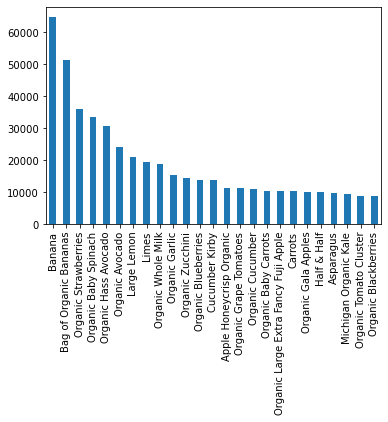

In [69]:
bar_top_25_selling_items = df_top_25_selling_items['product_name'].value_counts().plot.bar()

In [70]:
path_1 = r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\04 Analysis\Visualizations"

In [71]:
bar_top_25_selling_items.figure.savefig(os.path.join(path_1,'top_25_selling_items.png'))

# 7. Customer profile for usage frequency and expenditure 

In [72]:
sales_per_age_group = df_top_25_selling_items.groupby('age_group').agg({'order_number':['mean']})

In [73]:
sales_per_age_group

,order_number
,mean
age_group,
18-20,19.409289
21-30,19.349349
31-40,18.530317
41-50,17.457977
51-60,18.406841
61-70,18.614999
71-80,17.478323
80+,19.186987


In [74]:
sales_per_number_of_dependents = df_top_25_selling_items.groupby('parental_status').agg({'order_number':['mean']})

In [75]:
sales_per_number_of_dependents

,order_number
,mean
parental_status,
non parent,18.430278
parent,18.368061


In [76]:
sales_per_income = df_top_25_selling_items.groupby('income_range').agg({'order_number':['mean']})

In [77]:
sales_per_income

,order_number
,mean
income_range,
025000-040000,16.997932
040000-080000,19.021390
080000-120000,18.575957
120000-160000,17.488175
160000-210000,18.188736
210000-523000,20.834690
523000+,14.258741


In [78]:
sales_per_weekday = df_top_25_selling_items.groupby('weekday').agg({'order_number':['mean']})

In [79]:
sales_per_weekday

,order_number
,mean
weekday,
Friday,17.614024
Monday,18.742054
Saturday,16.961722
Sunday,18.280183
Thursday,19.377046
Tuesday,19.467126
Wednesday,19.504250


# 8. Compare your customer profiles with regions and departments 

In [80]:
# amount of sales for each department_id
sales_by_department_id = df_2.groupby('department_id').agg({'prices' : ['min', 'mean', 'max','sum']})

In [82]:
sales_by_department_id.to_clipboard()

In [83]:
df_2['prices'].value_counts().sort_index()

1.0        15866
1.1        33011
1.2        35431
1.3        58607
1.4        55148
           ...  
24.8          67
24.9         663
25.0        1988
14900.0      597
99999.0       60
Name: prices, Length: 240, dtype: int64

In [84]:
result = []

for value in df_2['prices']:
    if value >= 14900: 
        result.append('outlier')
    else: 
        result.append('other')

In [85]:
result

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',


In [86]:
# new column for outliers
df_2['price_range'] = result

In [87]:
df_2['price_range'].value_counts()

other      4471588
outlier        657
Name: price_range, dtype: int64

In [88]:
path = r"C:\Users\ms207\Desktop\CF\4\19012022 Instacart Basket Analysis\02 Data\Prepared data"

In [89]:
# export dataset

df_2.to_pickle(os.path.join(path, 'merged_final.pkl'))